This notebook is an example of the RoiSelector class which are objects used to highlight a specific
region of interest (ROI) of an image. 
There are three different types:
    1. Rectangle
    2. Ellipse 
    3. Freehand or Lasso

What is demonstrated here are the three ROI types and an exmaple of how they will be annotated on the image itself.
The exact color, fontsize, etc is completely adjustable. Upon selecting an ROI, the total intensity of within the ROI can be computed and the ROI can be adjusted. Most importantly, multiple ROIs can be chosen on a single image. This will be particularly handy for spectroscopy as multple spectra can be analyzed simultaneously by just selecting multiple ROIs.

In [1]:
from matplotlib.widgets import  EllipseSelector, RectangleSelector, LassoSelector
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from matplotlib import colors as mcolors, path
import RoiSelector
#Uncomment the following to have plots appear in their own window
#%matplotlib qt

In [4]:
#Shape of lasso, rectangle, and ellipse ROIs respecitvely
verts = [(268.93959401942607, 153.87083924478878), (265.87018443741135, 153.87083924478878), (262.80077485539675, 153.87083924478878), (260.75450180072039, 153.87083924478878), (257.68509221870568, 153.87083924478878), (255.63881916402929, 153.87083924478878), (254.6156826366911, 153.87083924478878), (253.59254610935292, 153.87083924478878), (252.56940958201469, 153.87083924478878), (249.50000000000009, 153.87083924478878), (248.47686347266185, 153.87083924478878), (247.45372694532367, 153.87083924478878), (246.43059041798543, 153.87083924478878), (243.36118083597083, 153.87083924478878), (242.33804430863259, 153.87083924478878), (239.26863472661799, 153.87083924478878), (238.24549819927975, 153.87083924478878), (237.22236167194157, 153.87083924478878), (236.19922514460333, 154.89397577212702), (234.15295208992691, 154.89397577212702), (233.12981556258873, 154.89397577212702), (230.06040598057407, 154.89397577212702), (229.03726945323589, 154.89397577212702), (228.01413292589771, 154.89397577212702), (226.99099639855947, 154.89397577212702), (225.96785987122129, 154.89397577212702), (224.94472334388306, 154.89397577212702), (223.92158681654487, 154.89397577212702), (222.89845028920664, 154.89397577212702), (220.85217723453022, 154.89397577212702), (219.82904070719204, 154.89397577212702), (218.8059041798538, 154.89397577212702), (217.78276765251562, 154.89397577212702), (216.75963112517738, 155.9171122994652), (215.7364945978392, 155.9171122994652), (214.71335807050096, 155.9171122994652), (212.66708501582454, 155.9171122994652), (211.64394848848636, 156.94024882680344), (210.62081196114812, 156.94024882680344), (209.59767543380994, 156.94024882680344), (208.5745389064717, 156.94024882680344), (207.55140237913352, 156.94024882680344), (206.52826585179528, 156.94024882680344), (206.52826585179528, 157.96338535414162), (206.52826585179528, 158.98652188147986), (206.52826585179528, 161.03279493615628), (206.52826585179528, 164.10220451817088), (206.52826585179528, 165.12534104550912), (206.52826585179528, 166.1484775728473), (206.52826585179528, 167.17161410018548), (206.52826585179528, 168.19475062752372), (206.52826585179528, 169.2178871548619), (206.52826585179528, 170.24102368220014), (206.52826585179528, 172.28729673687656), (206.52826585179528, 173.31043326421477), (206.52826585179528, 174.33356979155297), (206.52826585179528, 175.35670631889118), (206.52826585179528, 176.37984284622937), (206.52826585179528, 177.40297937356758), (207.55140237913352, 177.40297937356758), (207.55140237913352, 178.42611590090578), (207.55140237913352, 179.44925242824399), (207.55140237913352, 180.4723889555822), (207.55140237913352, 182.51866201025862), (207.55140237913352, 183.54179853759683), (207.55140237913352, 184.56493506493504), (207.55140237913352, 185.58807159227325), (207.55140237913352, 186.61120811961146), (207.55140237913352, 187.63434464694967), (207.55140237913352, 188.65748117428788), (207.55140237913352, 189.68061770162609), (207.55140237913352, 190.7037542289643), (207.55140237913352, 191.72689075630251), (207.55140237913352, 192.75002728364072), (207.55140237913352, 193.77316381097893), (207.55140237913352, 194.79630033831711), (207.55140237913352, 195.81943686565532), (207.55140237913352, 196.84257339299353), (207.55140237913352, 197.86570992033174), (207.55140237913352, 199.91198297500816), (208.5745389064717, 199.91198297500816), (208.5745389064717, 200.93511950234637), (208.5745389064717, 201.95825602968458), (208.5745389064717, 202.98139255702279), (208.5745389064717, 204.004529084361), (208.5745389064717, 205.02766561169921), (208.5745389064717, 206.05080213903742), (208.5745389064717, 207.07393866637562), (208.5745389064717, 209.12021172105204), (208.5745389064717, 210.14334824839025), (208.5745389064717, 211.16648477572846), (208.5745389064717, 212.18962130306667), (208.5745389064717, 213.21275783040485), (208.5745389064717, 214.23589435774306), (207.55140237913352, 216.28216741241948), (205.5051293244571, 218.3284404670959), (205.5051293244571, 219.35157699443411), (203.45885626978068, 220.37471352177232), (201.41258321510426, 222.42098657644874), (201.41258321510426, 223.44412310378695), (200.38944668776608, 223.44412310378695), (200.38944668776608, 224.46725963112516), (200.38944668776608, 225.49039615846337), (200.38944668776608, 226.51353268580158), (200.38944668776608, 228.559805740478), (199.36631016042784, 229.58294226781621), (199.36631016042784, 230.60607879515442), (198.34317363308966, 231.6292153224926), (198.34317363308966, 232.65235184983081), (198.34317363308966, 233.67548837716902), (198.34317363308966, 234.69862490450723), (198.34317363308966, 235.72176143184544), (198.34317363308966, 236.74489795918365), (198.34317363308966, 237.76803448652186), (198.34317363308966, 238.79117101386007), (198.34317363308966, 239.81430754119827), (198.34317363308966, 240.83744406853648), (198.34317363308966, 241.86058059587469), (198.34317363308966, 242.8837171232129), (198.34317363308966, 243.90685365055111), (198.34317363308966, 245.95312670522753), (199.36631016042784, 246.97626323256574), (199.36631016042784, 247.99939975990395), (199.36631016042784, 249.02253628724216), (199.36631016042784, 250.04567281458037), (200.38944668776608, 250.04567281458037), (201.41258321510426, 250.04567281458037), (201.41258321510426, 251.06880934191855), (202.43571974244244, 251.06880934191855), (204.48199279711886, 252.09194586925676), (205.5051293244571, 252.09194586925676), (206.52826585179528, 253.11508239659497), (206.52826585179528, 255.16135545127139), (206.52826585179528, 256.18449197860957), (207.55140237913352, 257.20762850594781), (208.5745389064717, 257.20762850594781), (209.59767543380994, 258.23076503328605), (209.59767543380994, 259.25390156062423), (210.62081196114812, 260.27703808796241), (211.64394848848636, 260.27703808796241), (211.64394848848636, 261.30017461530065), (213.69022154316278, 261.30017461530065), (213.69022154316278, 262.32331114263889), (213.69022154316278, 263.34644766997707), (213.69022154316278, 264.36958419731525), (213.69022154316278, 265.39272072465349), (213.69022154316278, 266.41585725199172), (213.69022154316278, 267.43899377932991), (214.71335807050096, 268.46213030666809), (214.71335807050096, 269.48526683400632), (214.71335807050096, 270.50840336134451), (214.71335807050096, 271.53153988868269), (215.7364945978392, 272.55467641602092), (215.7364945978392, 274.60094947069734), (216.75963112517738, 275.62408599803553), (216.75963112517738, 276.64722252537376), (217.78276765251562, 277.670359052712), (217.78276765251562, 278.69349558005018), (217.78276765251562, 279.71663210738836), (218.8059041798538, 280.7397686347266), (218.8059041798538, 281.76290516206484), (219.82904070719204, 283.8091782167412), (220.85217723453022, 284.83231474407944), (221.87531376186845, 285.85545127141768), (221.87531376186845, 286.87858779875586), (222.89845028920664, 287.90172432609404), (223.92158681654487, 288.92486085343228), (224.94472334388306, 288.92486085343228), (225.96785987122129, 288.92486085343228), (226.99099639855947, 288.92486085343228), (228.01413292589771, 288.92486085343228), (229.03726945323589, 288.92486085343228), (230.06040598057407, 288.92486085343228), (233.12981556258873, 288.92486085343228), (235.17608861726515, 288.92486085343228), (237.22236167194157, 288.92486085343228), (238.24549819927975, 288.92486085343228), (240.29177125395617, 288.92486085343228), (243.36118083597083, 288.92486085343228), (244.38431736330901, 288.92486085343228), (245.40745389064725, 287.90172432609404), (245.40745389064725, 286.87858779875586), (246.43059041798543, 285.85545127141768), (247.45372694532367, 284.83231474407944), (248.47686347266185, 283.8091782167412), (249.50000000000009, 282.78604168940302), (249.50000000000009, 281.76290516206484), (251.5462730546765, 280.7397686347266), (252.56940958201469, 279.71663210738836), (252.56940958201469, 278.69349558005018), (253.59254610935292, 277.670359052712), (253.59254610935292, 275.62408599803553), (253.59254610935292, 274.60094947069734), (254.6156826366911, 273.57781294335916), (255.63881916402929, 272.55467641602092), (255.63881916402929, 271.53153988868269), (256.66195569136755, 269.48526683400632), (258.70822874604391, 266.41585725199172), (258.70822874604391, 265.39272072465349), (260.75450180072039, 264.36958419731525), (260.75450180072039, 262.32331114263889), (261.77763832805852, 262.32331114263889), (262.80077485539675, 261.30017461530065), (263.82391138273499, 260.27703808796241), (263.82391138273499, 259.25390156062423), (264.84704791007323, 258.23076503328605), (266.89332096474959, 257.20762850594781), (267.91645749208783, 257.20762850594781), (268.93959401942607, 256.18449197860957), (269.96273054676419, 256.18449197860957), (272.00900360144067, 255.16135545127139), (273.03214012877891, 255.16135545127139), (274.05527665611703, 255.16135545127139), (275.07841318345527, 255.16135545127139), (277.12468623813174, 255.16135545127139), (278.14782276546987, 252.09194586925676), (279.17095929280811, 252.09194586925676), (280.19409582014634, 252.09194586925676), (281.21723234748447, 252.09194586925676), (283.26350540216094, 251.06880934191855), (284.28664192949918, 251.06880934191855), (286.33291498417555, 251.06880934191855), (288.37918803885202, 250.04567281458037), (289.40232456619015, 250.04567281458037), (290.42546109352838, 250.04567281458037), (291.44859762086662, 249.02253628724216), (292.47173414820486, 249.02253628724216), (293.49487067554298, 247.99939975990395), (295.54114373021946, 246.97626323256574), (297.58741678489582, 245.95312670522753), (298.61055331223406, 244.92999017788932), (300.65682636691054, 242.8837171232129), (300.65682636691054, 241.86058059587469), (301.67996289424866, 241.86058059587469), (302.7030994215869, 240.83744406853648), (304.74937247626337, 239.81430754119827), (305.7725090036015, 238.79117101386007), (306.79564553093974, 237.76803448652186), (307.81878205827798, 235.72176143184544), (308.8419185856161, 232.65235184983081), (309.86505511295434, 230.60607879515442), (309.86505511295434, 229.58294226781621), (309.86505511295434, 228.559805740478), (310.88819164029258, 226.51353268580158), (310.88819164029258, 225.49039615846337), (310.88819164029258, 224.46725963112516), (310.88819164029258, 223.44412310378695), (310.88819164029258, 222.42098657644874), (310.88819164029258, 221.39785004911053), (310.88819164029258, 219.35157699443411), (310.88819164029258, 218.3284404670959), (310.88819164029258, 217.30530393975769), (310.88819164029258, 216.28216741241948), (310.88819164029258, 214.23589435774306), (310.88819164029258, 213.21275783040485), (310.88819164029258, 211.16648477572846), (310.88819164029258, 210.14334824839025), (309.86505511295434, 210.14334824839025), (309.86505511295434, 209.12021172105204), (308.8419185856161, 207.07393866637562), (307.81878205827798, 206.05080213903742), (307.81878205827798, 204.004529084361), (306.79564553093974, 202.98139255702279), (306.79564553093974, 201.95825602968458), (304.74937247626337, 200.93511950234637), (303.72623594892514, 199.91198297500816), (303.72623594892514, 198.88884644766995), (302.7030994215869, 197.86570992033174), (302.7030994215869, 196.84257339299353), (302.7030994215869, 193.77316381097893), (302.7030994215869, 192.75002728364072), (302.7030994215869, 191.72689075630251), (302.7030994215869, 189.68061770162609), (303.72623594892514, 182.51866201025862), (306.79564553093974, 178.42611590090578), (308.8419185856161, 176.37984284622937), (311.91132816763081, 173.31043326421477), (312.93446469496894, 172.28729673687656), (313.95760122230718, 171.26416020953832), (316.00387427698365, 170.24102368220014), (317.02701080432178, 170.24102368220014), (319.07328385899825, 169.2178871548619), (321.11955691367461, 168.19475062752372), (322.14269344101285, 168.19475062752372), (324.18896649568933, 167.17161410018548), (327.25837607770393, 166.1484775728473), (328.28151260504217, 166.1484775728473), (330.32778565971853, 164.10220451817088), (330.32778565971853, 163.0790679908327), (332.37405871439501, 162.05593146349446), (333.39719524173313, 161.03279493615628), (333.39719524173313, 160.00965840881804), (333.39719524173313, 158.98652188147986), (333.39719524173313, 157.96338535414162), (332.37405871439501, 157.96338535414162), (331.35092218705677, 157.96338535414162), (330.32778565971853, 157.96338535414162), (329.30464913238029, 157.96338535414162), (328.28151260504217, 157.96338535414162), (327.25837607770393, 157.96338535414162), (326.23523955036569, 157.96338535414162), (325.21210302302745, 157.96338535414162), (324.18896649568933, 157.96338535414162), (323.16582996835109, 157.96338535414162), (321.11955691367461, 156.94024882680344), (319.07328385899825, 155.9171122994652), (318.05014733166001, 155.9171122994652), (316.00387427698365, 155.9171122994652), (314.98073774964541, 155.9171122994652), (313.95760122230718, 155.9171122994652), (312.93446469496894, 155.9171122994652), (311.91132816763081, 155.9171122994652), (310.88819164029258, 155.9171122994652), (309.86505511295434, 155.9171122994652), (307.81878205827798, 155.9171122994652), (306.79564553093974, 155.9171122994652), (305.7725090036015, 155.9171122994652), (304.74937247626337, 155.9171122994652), (303.72623594892514, 153.87083924478878), (302.7030994215869, 153.87083924478878), (302.7030994215869, 152.8477027174506), (301.67996289424866, 152.8477027174506), (301.67996289424866, 151.82456619011236), (300.65682636691054, 151.82456619011236), (300.65682636691054, 151.82456619011236)]
rec_extents = (15, 125, 15, 125)
ellipse_extents = (300, 400, 250, 350)

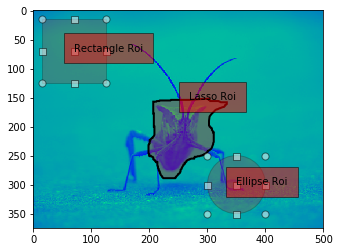

In [5]:
#Load image as numpy array and plot to axes
img_data = mpimg.imread('numpy.png')#'Cell2_Fe_K_27487_norm.tif')
img_data = img_data[:,:,0]
fig = plt.figure()
ax = fig.add_subplot(111)
img = ax.imshow(img_data, cmap='winter')

#Create lasso ROI
lasso = RoiSelector.RoiSelector(ax, 'lasso')
lasso.lasso_select(verts)
lasso.label('Lasso Roi')

#Create rectangle ROI
rect = RoiSelector.RoiSelector(ax, 'rectangle')
rect.draw(rec_extents)
rect.label('Rectangle Roi')
rect.active(False)

#Create ellipse ROI
ellipse = RoiSelector.RoiSelector(ax, 'ellipse')
ellipse.draw(ellipse_extents)
ellipse.label('Ellipse Roi')
ellipse.active(False)

plt.show() 